<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/%E6%A1%88%E4%BE%8B%E4%B8%80%EF%BC%9A%E9%B8%A2%E5%B0%BE%E8%8A%B1%E6%95%B0%E6%8D%AE%E5%88%86%E7%B1%BB(bayes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

In [7]:
# 花萼长度、花萼宽度，花瓣长度，花瓣宽度
iris_feature_E = 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature_C = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
features = [2,3]

In [68]:
iris = datasets.load_iris()

x = iris.data[:,2:]
y = iris.target
print ("总样本数目：%d；特征属性数目：%d" % x.shape)
print(y)

总样本数目：150；特征属性数目：2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [69]:
## 0. 数据分割，形成模型训练数据和测试数据
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, train_size=0.8, random_state=28)
x_train, x_test, y_train, y_test = x_train1, x_test1, y_train1, y_test1
print ("训练数据集样本数目：%d, 测试数据集样本数目：%d" % (x_train.shape[0], x_test.shape[0]))


训练数据集样本数目：120, 测试数据集样本数目：30


In [70]:
## 高斯贝叶斯模型构建
clf = Pipeline([
        ('sc', StandardScaler()), # 标准化，转换为高斯分布，这里用归一化效果不好
        ('poly', PolynomialFeatures(degree=1)),
        ('clf', GaussianNB())])
## 训练模型
clf.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('clf', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

In [71]:
## 计算预测值并计算准确率
y_train_hat = clf.predict(x_train)
print ('训练集准确度: %.2f%%' % (100 * accuracy_score(y_train, y_train_hat)))

训练集准确度: 95.83%


In [72]:
y_test_hat = clf.predict(x_test)
print ('测试集准确度：%.2f%%' % (100 * accuracy_score(y_test, y_test_hat)))

测试集准确度：96.67%


In [73]:
## 产生区域图
N, M = 500, 500     # 横纵各采样多少个值
x1_min1, x2_min1 = np.min(x_train,axis=0)
x1_max1, x2_max1 = np.max(x_train,axis=0)
x1_min2, x2_min2 = np.min(x_test,axis=0)
x1_max2, x2_max2 = np.max(x_test,axis=0)
x1_min = np.min((x1_min1, x1_min2))
x1_max = np.max((x1_max1, x1_max2))
x2_min = np.min((x2_min1, x2_min2))
x2_max = np.max((x2_max1, x2_max2))

t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, N)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.dstack((x1.flat, x2.flat))[0] # 测试点

cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_show_hat = clf.predict(x_show)                  # 预测值
y_show_hat = y_show_hat.reshape(x1.shape)

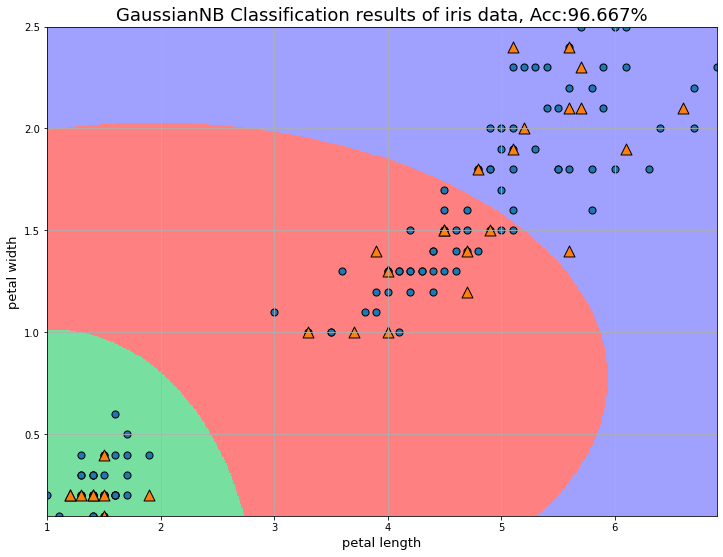

In [74]:
## 画图
plt.figure(facecolor='w',figsize=(12,9))
plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light)     # 预测值的显示
plt.scatter(x_train[:,0], x_train[:,1], edgecolors='k', s=50, cmap=cm_dark)
plt.scatter(x_test[:,0], x_test[:,1], marker='^', edgecolors='k', s=120, cmap=cm_dark)
plt.xlabel(iris_feature_E[features[0]], fontsize=13)
plt.ylabel(iris_feature_E[features[1]], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'GaussianNB Classification results of iris data, Acc:%.3f%%' % (100 * accuracy_score(y_test, y_test_hat)), fontsize=18)
plt.grid(True)
plt.show()